In [191]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [192]:
df = pd.read_csv("CarPrice.csv",header=0)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [194]:
Numerics = LabelEncoder()
df["doornumber"] = Numerics.fit_transform(df["doornumber"])
df["fueltype"] = Numerics.fit_transform(df["fueltype"])

In [195]:
#DEleting Unnecessary Columns
df = df.drop(["car_ID","CarName","cylindernumber","aspiration","carbody","drivewheel","enginelocation","fuelsystem","enginetype"],axis=1)
df.info()
# df["fueltype"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   doornumber        205 non-null    int64  
 3   wheelbase         205 non-null    float64
 4   carlength         205 non-null    float64
 5   carwidth          205 non-null    float64
 6   carheight         205 non-null    float64
 7   curbweight        205 non-null    int64  
 8   enginesize        205 non-null    int64  
 9   boreratio         205 non-null    float64
 10  stroke            205 non-null    float64
 11  compressionratio  205 non-null    float64
 12  horsepower        205 non-null    int64  
 13  peakrpm           205 non-null    int64  
 14  citympg           205 non-null    int64  
 15  highwaympg        205 non-null    int64  
 16  price             205 non-null    float64
dt

In [196]:
#Splitting the Matrix
data = df.values
X = data[:,0:16]
Y = data[:,16]

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [198]:

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=60)
DT = LinearRegression()
DT.fit(X,Y)
prediction = DT.predict(x_test)

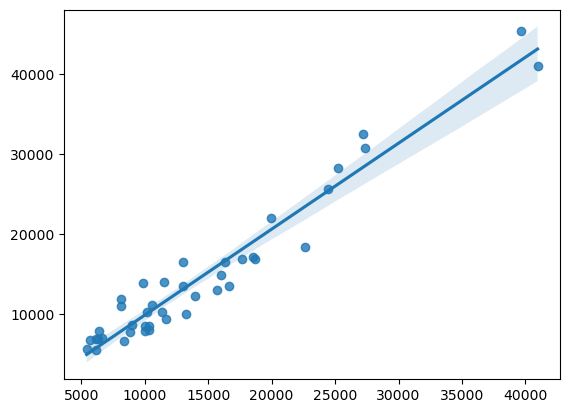

In [199]:
sns.regplot(x=prediction,y=y_test)

In [200]:
r2_score(y_test,prediction)

0.9340564462495842